<h1 class="text-center">Introduction to Machine Learning: Titanic learning from the disaster</h1>
<h2 class="text-center">February, 2022</h2>


The purpose of this tutorial is to to predict who will survive and who will die on the Titanic using passengers data (age, ticket price, class, etc). The data are coming from a [Kaggle datascience competition](https://www.kaggle.com/c/titanic). You will use Pandas to load and pre-process the data and Sklearn for the classification part. 


![](img/dicap_titanic.png)

- In Section I, exploration data analysis, visualization and basic prediction based on gender
- In Section II, data pre-processing: scalling, missing values and categorical data encoding
- In Section III, a first pipeline using Logistic Regression 
- In Section IV, a second pipeline using RandomForest
- The last section (V) is an opportunity to improve and explore other pipelines (XGBoost, Ensemble Learning,...) from what you learnt today.

The code must be completed after each **Question** to work, where "HERE" appears as a comment in the code. The parameters that do not change the course of the story are accompanied "EDIT ME!" as a comment: you can change them at the time or at the end of the section to see the changes involved.

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns

## Section I

Load the train CSV file using pandas and display the 5 first rows.

In [2]:
train = pd.read_csv("input/train.csv") # EDIT ME
train.head() # EDIT ME

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We got a column `Survived` that corresponds to the label we will try to predict.

Also load and display test data.

In [3]:
test = pd.read_csv("input/test.csv") # EDIT ME
test.head() # EDIT ME

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


There is no `Survived` column in the test set, of course !

### Exploration Data Analysis (EDA)

First we will explore the data and do some plotting to know better what we have at hand.

In [4]:
# List of columns
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Hoyt, Mrs. Frederick Maxfield (Jane Anne Forby)",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


* We have 891 training examples (passengers), that is quite limited but still OK to do Machine Learning.

* It seems that some values are missing (`NaN`). We would need to how many values are missing for each feature.

* Some features are categorical (e.g. `Sex`, `Pclass`, `Embarked`), some other numerical (`Age`, `Fare`, `SibSp`, `Parch`) and finally some alphanumeric (`Ticket`, `Cabin`). We would need to transform the categorical data so they can be processed by a classifier (only numerical data).

In [6]:
# percentage of missing values
print(pd.isnull(train).sum()/len(train)*100)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


The `Cabin` features is missing for 77.1% of the passengers, so we would probably drop it as too many values are missing. 

`Age` is probably an important feature and missing for ~20% of the passengers. We will try to fill the gaps.

### Our intuitions on the data
* Based on the movie and on "women and children first", women and kids are probably more likely to survive.
* People in first class are more likely to survive as their cabin is on top of the boat. 
* People traveling alone are more likely to survive as they did not have to wait for relatives that may be slower. 

Let do some plotting to check our intuitions.

#### Male/Female
Draw a first bar plot of sex survival by sex and compute mean percentage of male and woman who survived.

Percentage of male: 64.76%


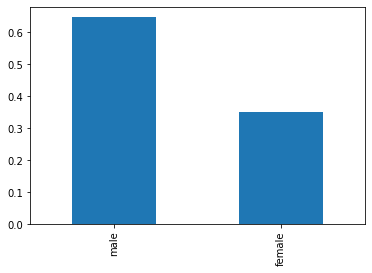

In [7]:
train["Sex"].value_counts(normalize = True).plot(kind='bar')
print("Percentage of male: {0:.2f}%".format(train["Sex"].value_counts(normalize = True)[0]*100))

<AxesSubplot:>

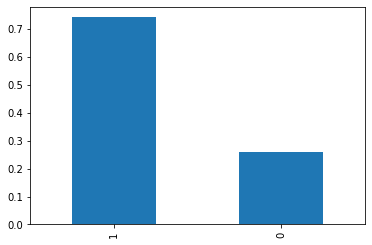

In [8]:
train["Survived"][train["Sex"] == 'female'].value_counts(normalize = True).plot(kind='bar') # EDIT ME

In [9]:
print("Percentage of females who survived: {0:.2f}%".format(train["Survived"][train["Sex"] == 'female'].value_counts(normalize = True)[1]*100)) # EDIT ME

print("Percentage of males who survived: {0:.2f}%".format(train["Survived"][train["Sex"] == 'male'].value_counts(normalize = True)[1]*100)) # EDIT ME

Percentage of females who survived: 74.20%
Percentage of males who survived: 18.89%


So if we predict that all males will die and all female will survive we would reach an accuracy of: $0.6476\times(1-0.1889) + (1-0.6476)*0.7420)$ = 78.7%. 

Not bad ! Will be hard to beat !

### Passenger class feature: `Pclass`
Do the same analysis with passenger class.

Percentage of Pclass = 1 who survived: 62.96%
Percentage of Pclass = 2 who survived: 47.28%
Percentage of Pclass = 3 who survived: 24.24%


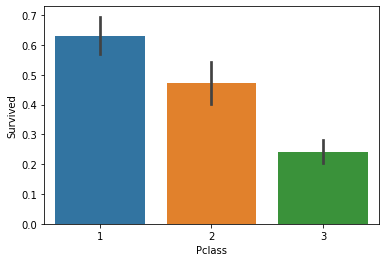

In [10]:
sns.barplot(x="Pclass", y="Survived", data=train)

#print percentage of people by Pclass that survived
print("Percentage of Pclass = 1 who survived: {0:.2f}%".format(train["Survived"][train["Pclass"] == 1].value_counts(normalize = True)[1]*100))

print("Percentage of Pclass = 2 who survived: {0:.2f}%".format(train["Survived"][train["Pclass"] == 2].value_counts(normalize = True)[1]*100))

print("Percentage of Pclass = 3 who survived: {0:.2f}%".format(train["Survived"][train["Pclass"] == 3].value_counts(normalize = True)[1]*100))


This could be intersected with the `Sex` feature to improve our first naive classifier (equivalent of pivot table from Excel !)

In [11]:
train.groupby(['Pclass','Sex'])['Survived'].mean()

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64

96.8% of women from first class have survived and only 13.5% of men from thrid class.

## Section 2: missing values and data pre-processing
First we will drop `Cabin` feature values as too many are missing. We will also drop the Ticket number as it is very unlikely that it contains any useful information.

In [12]:
train = train.drop(['Cabin','Ticket'], axis = 1) # EDIT ME
test = test.drop(['Cabin', 'Ticket'], axis = 1) # EDIT ME

### Encode non-numerical labels
In the `Name` feature each passenger has a title that we will use to infer age when it is missing. We will encode the non-numerical labels to a numerical value: Master $\rightarrow$ 0, Miss $\rightarrow$ 1, ... 

In [13]:
combine = [train, test]

# extract the title from the name
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [14]:
#replace various titles with more common names
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


In [15]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
train['Title'] = le.fit_transform(train['Title'].values)
test['Title'] = le.transform(test['Title'].values)
print(le.classes_)

['Master' 'Miss' 'Mr' 'Mrs' 'Rare' 'Royal']


In [16]:
train['Title'].value_counts()

2    517
1    185
3    126
0     40
4     21
5      2
Name: Title, dtype: int64

In [17]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,2


### Filling Age missing values

First we need to discretize the ages. It does not matter if a passenger is 31 or 32, what matter is that the passenger is young.

<AxesSubplot:xlabel='AgeGroup', ylabel='Survived'>

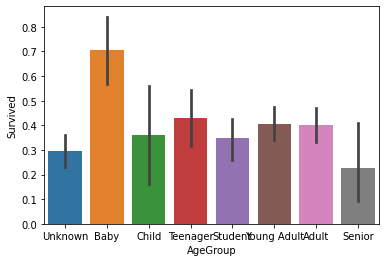

In [18]:
#sort the ages into logical categories
train["Age"] = train["Age"].fillna(-0.5) # fill na with negative values 
test["Age"] = test["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut(train["Age"], bins, labels = labels)
test['AgeGroup'] = pd.cut(test["Age"], bins, labels = labels)

#draw a bar plot of Age vs. survival
sns.barplot(x="AgeGroup", y="Survived", data=train)

We will now use this Age Group to intersect it with the Title use the most frequent age group for each title.

In [19]:
# Get the mode age for each title category
master_age = train[train["Title"] == 0]["AgeGroup"].mode() #Baby
miss_age = train[train["Title"] == 1]["AgeGroup"].mode() #Student
mr_age = train[train["Title"] == 2]["AgeGroup"].mode() #Young Adult
mrs_age = train[train["Title"] == 3]["AgeGroup"].mode() #Adult
rare_age = train[train["Title"] == 4]["AgeGroup"].mode() #Adult
royal_age = train[train["Title"] == 5]["AgeGroup"].mode() #Adult

age_title_mapping = {0: "Baby", 1: "Student", 2: "Young Adult", 3: "Adult", 4: "Adult", 5: "Adult"}

#I tried to get this code to work with using .map(), but couldn't.
#I've put down a less elegant, temporary solution for now.
#train = train.fillna({"Age": train["Title"].map(age_title_mapping)})
#test = test.fillna({"Age": test["Title"].map(age_title_mapping)})

for x in range(len(train["AgeGroup"])):
    if train["AgeGroup"][x] == "Unknown":
        train["AgeGroup"][x] = age_title_mapping[train["Title"][x]]
        
for x in range(len(test["AgeGroup"])):
    if test["AgeGroup"][x] == "Unknown":
        test["AgeGroup"][x] = age_title_mapping[test["Title"][x]]

### Embarked Feature: fill missing values and OneHotEncode it

In [20]:
#now we need to fill in the missing values in the Embarked feature
print("Number of people embarking in Southampton (S):")
southampton = train[train["Embarked"] == "S"].shape[0]
print(southampton)

print("Number of people embarking in Cherbourg (C):")
cherbourg = train[train["Embarked"] == "C"].shape[0]
print(cherbourg)

print("Number of people embarking in Queenstown (Q):")
queenstown = train[train["Embarked"] == "Q"].shape[0]
print(queenstown)

Number of people embarking in Southampton (S):
644
Number of people embarking in Cherbourg (C):
168
Number of people embarking in Queenstown (Q):
77


It's clear that the majority of people embarked in Southampton (S). Let's go ahead and fill in the missing values with S.

In [21]:
#replacing the missing values in the Embarked feature with S
train = train.fillna({"Embarked": "S"})

### One Hot Encoding
We could encode with S: 0, C: 1 and Q: 2 but it would mean that S is closer to C than Q which may not be true in practice. So instead we will create 3 collumns that encode for S, C and Q

In [22]:
one_hot = pd.get_dummies(train['Embarked'], sparse=False)
train = train.drop('Embarked',axis = 1)
train = train.join(one_hot)

In [23]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Title,AgeGroup,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,2,Student,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,3,Adult,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,1,Young Adult,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,3,Young Adult,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,2,Young Adult,0,0,1


#### Drop name feature

In [24]:
train = train.drop(['Name'], axis = 1) # EDIT ME
test = test.drop(['Name'], axis = 1) # EDIT ME

#### Encode sex feature

In [25]:
le = preprocessing.LabelEncoder()
train['Sex'] = le.fit_transform(train['Sex'].values)
test['Sex'] = le.transform(test['Sex'].values)

#### Drop fare values as it is redundant with class information#drop Fare values

In [26]:
train = train.drop(['Fare'], axis = 1)
test = test.drop(['Fare'], axis = 1)

#### Encode age groupe and drop age

In [27]:
le = preprocessing.LabelEncoder()
train['AgeGroup'] = le.fit_transform(train['AgeGroup'].values)
test['AgeGroup'] = le.transform(test['AgeGroup'].values)

train = train.drop(['Age'], axis = 1)
test = test.drop(['Age'], axis = 1)

In [28]:
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Title,AgeGroup,C,Q,S
0,1,0,3,1,1,0,2,4,0,0,1
1,2,1,1,0,1,0,3,0,1,0,0
2,3,1,3,0,0,0,1,6,0,0,1
3,4,1,1,0,1,0,3,6,0,0,1
4,5,0,3,1,0,0,2,6,0,0,1


## Section III: Logisitic Rgresssion

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

predictors = train.drop(['Survived', 'PassengerId'], axis=1)
targets = train["Survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, targets, test_size = 0.22, random_state = 0)

In [30]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Accuracy on the validation set: {0:.2f}%".format(acc_logreg))

Accuracy on the validation set: 79.19%


Only 1% better than the guess based on gender !!

## Section IV: RandomForest

![](https://i.imgur.com/AC9Bq63.png)

We will use only 4 features: **"Pclass"**, **"Sex"**, **"SibSp"**, and **"Parch"**.

In [42]:
from sklearn.ensemble import RandomForestClassifier

features = ["Pclass", "Sex", "SibSp", "Parch"]
predictors = train[features]
x_train, x_val, y_train, y_val = train_test_split(predictors, targets, test_size = 0.22, random_state = 42)
X_test = test[features]

rf = RandomForestClassifier(n_estimators=20, max_depth=2, max_features=2, random_state=1)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_val)
acc_rf = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Accuracy on the validation set: {0:.2f}%".format(acc_rf))

Accuracy on the validation set: 80.20%


In [38]:
predictions = rf.predict(X_test)

output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)

You can use this `submission.csv` file to try to participate to the Kaggle competition ! 

## Section V: harder, bettter, faster, stronger

Try to do better with :
* Use more features and [select them](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html#sklearn.feature_selection.SequentialFeatureSelector)
* Optimized hyper-parameters (using [`GridSearch`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV);
* More advanced classification algorithms such as [`Gradient Boosting classifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)